In [1]:
%matplotlib inline


# Plotting Bagging Regression Error Bars

This example demonstrates using `forestci` to calculate the error bars of
the predictions of a :class:`sklearn.ensemble.BaggingRegressor` object.

The data used here are a classical machine learning data-set, describing
various features of different cars, and their MPG.


Failed to import duecredit due to No module named 'duecredit'
C:\Users\nkalimip\Anaconda3\envs\pred_est\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
C:\Users\nkalimip\Anaconda3\envs\pred_est\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


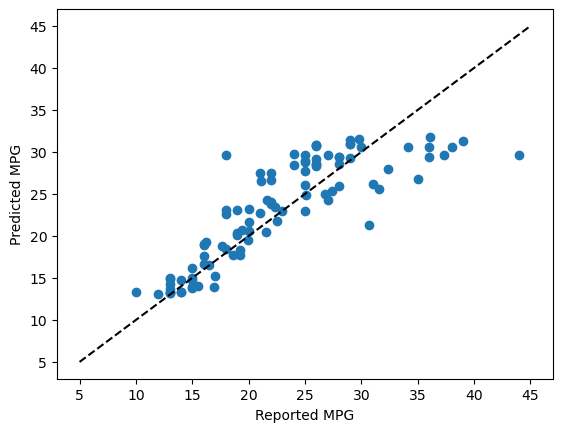

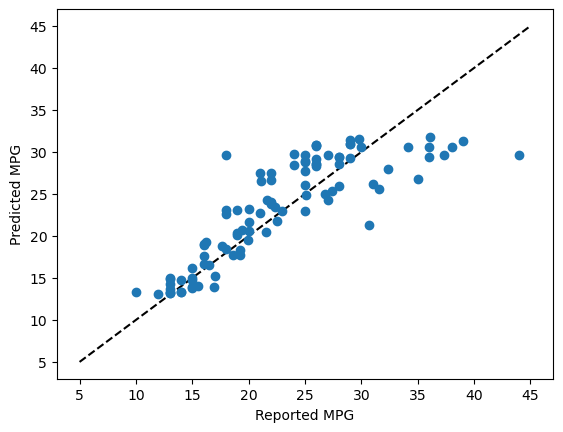

In [2]:
# Regression Forest Example
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
import sklearn.model_selection as xval
from sklearn.datasets import fetch_openml
import forestci as fci

# retreive mpg data from machine learning library
mpg_data = fetch_openml(data_id=196)

# separate mpg data into predictors and outcome variable
mpg_X = mpg_data["data"]
mpg_y = mpg_data["target"]

# remove rows where the data is nan
not_null_sel = np.where(mpg_X.isna().sum(axis=1).values == 0)
mpg_X = mpg_X.values[not_null_sel]
mpg_y = mpg_y.values[not_null_sel]

# split mpg data into training and test set
mpg_X_train, mpg_X_test, mpg_y_train, mpg_y_test = xval.train_test_split(
    mpg_X, mpg_y, test_size=0.25, random_state=42
)

# Create RandomForestRegressor
n_estimators = 1000
mpg_bagger = BaggingRegressor(
    base_estimator=SVR(), n_estimators=n_estimators, random_state=42
)
mpg_bagger.fit(mpg_X_train, mpg_y_train)
mpg_y_hat = mpg_bagger.predict(mpg_X_test)

# Plot predicted MPG without error bars
plt.scatter(mpg_y_test, mpg_y_hat)
plt.plot([5, 45], [5, 45], "k--")
plt.xlabel("Reported MPG")
plt.ylabel("Predicted MPG")
plt.show()

# Calculate the variance
mpg_V_IJ_unbiased = fci.random_forest_error(mpg_bagger, mpg_X_train, mpg_X_test)

# Plot error bars for predicted MPG using unbiased variance
plt.errorbar(mpg_y_test, mpg_y_hat, yerr=np.sqrt(mpg_V_IJ_unbiased), fmt="o")
plt.plot([5, 45], [5, 45], "k--")
plt.xlabel("Reported MPG")
plt.ylabel("Predicted MPG")
plt.show()